In [2]:
import matplotlib.pyplot as plt
import pandas as pd  
from random import randint

from string import ascii_lowercase as letters


In [3]:
# using a book to read the freq of occurance of letters  [ The Adventures of Sherlock Holmes by Arthur Conan Doyle ]

with open("text.txt") as f:
    text = f.read().lower()
    letterDict = dict((l, text.count(l)) for l in letters)
    print(letterDict)

{'a': 36142, 'b': 6638, 'c': 11103, 'd': 19100, 'e': 54944, 'f': 9363, 'g': 8299, 'h': 29579, 'i': 31248, 'j': 544, 'k': 3681, 'l': 17636, 'm': 12155, 'n': 29731, 'o': 34869, 'p': 7284, 'q': 437, 'r': 25684, 's': 27965, 't': 40511, 'u': 13636, 'v': 4572, 'w': 11534, 'x': 577, 'y': 9760, 'z': 153}


In [115]:
# this func will take our dictionary variable as input 
# which contain letters as 'keys' and their freqence as 'values'
# and plot it for us 

def plotDict(dict):
    
    y = dict.values()
    x = range(len(dict))


    plt.rcParams['figure.figsize'] = [15, 5]
    axes = plt.gca()
    axes.set_ylim([0,max(dict.values())])


    plt.bar(x, y,  color = (0.3,0.1,0.4,0.6), align='center')

    plt.xticks(range(len(letterDict)), list(letterDict.keys()))

    label = list(y)
    

    # Text on the top of each barplot
    scale = max(dict.values()) / 10
    for a,b in zip(x, y):
        plt.text(a-0.2, b+scale  , str(b) ,size = 10 , rotation=90)


    plt.xticks(rotation=70)

    plt.xlabel(' letters ')
    plt.ylabel(' frequency of occurence')

    plt.show()


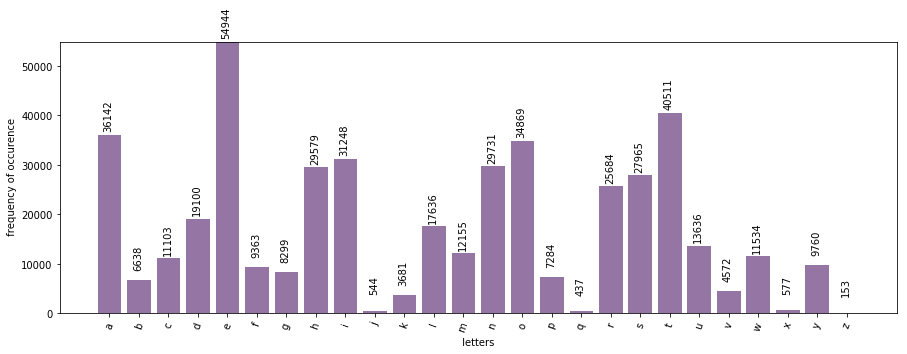

In [113]:
plotDict(letterDict)

In [34]:
#  a  - z
# 97 - 122

private_key = []

# creat our private key y mapping each letter to random lowerCase letter 
randarray = random.sample(range(97, 123), 123-97)

for num in randarray:
    private_key.append(chr(num))

    
print(private_key)

# #create dictionary 
dictionary = dict(zip(letters, private_key))
dictionary



['w', 'm', 'b', 'n', 'l', 'i', 'c', 'd', 's', 'x', 'p', 't', 'k', 'y', 'f', 'a', 'g', 'q', 'e', 'r', 'v', 'h', 'j', 'o', 'z', 'u']


{'a': 'w',
 'b': 'm',
 'c': 'b',
 'd': 'n',
 'e': 'l',
 'f': 'i',
 'g': 'c',
 'h': 'd',
 'i': 's',
 'j': 'x',
 'k': 'p',
 'l': 't',
 'm': 'k',
 'n': 'y',
 'o': 'f',
 'p': 'a',
 'q': 'g',
 'r': 'q',
 's': 'e',
 't': 'r',
 'u': 'v',
 'v': 'h',
 'w': 'j',
 'x': 'o',
 'y': 'z',
 'z': 'u'}

In [62]:
# use private key to encrypt  any text file

with open("article.txt") as f:
    text = f.read().lower()
    tmp = text

cipherText = text.translate(str.maketrans(dictionary))  ## this fnction will do the magic XD

In [63]:
# saving our generated encrypted text in a file 

with open('cipher.txt', 'w') as file:
    file.write(cipherText)

In [100]:
# lets now try to read our encrypted file and check the freq of occurnce of letterss within it 
with open("cipher.txt") as f:
    text = f.read().lower()
    cipherDict = dict((l, text.count(l)) for l in letters)
    print(cipherDict)


{'a': 291, 'b': 532, 'c': 336, 'd': 786, 'e': 1033, 'f': 1277, 'g': 16, 'h': 150, 'i': 346, 'j': 311, 'k': 404, 'l': 1933, 'm': 315, 'n': 623, 'o': 68, 'p': 127, 'q': 891, 'r': 1566, 's': 1141, 't': 705, 'u': 12, 'v': 456, 'w': 1207, 'x': 25, 'y': 1148, 'z': 344}


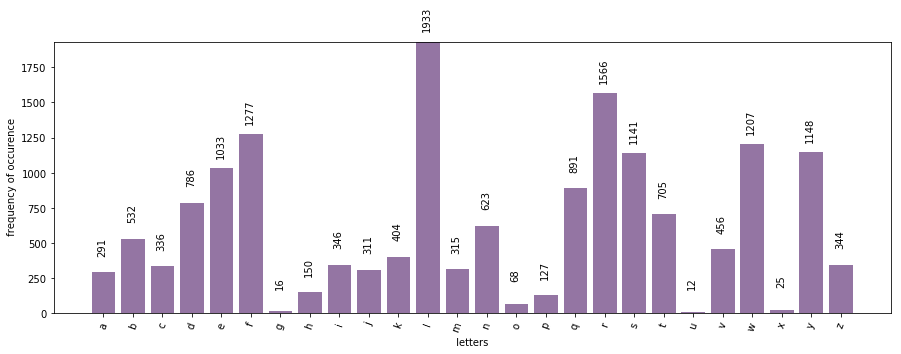

In [114]:
plotDict(cipherDict)

In [70]:
max(letterDict.values())

54944